In [7]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
# Loading your IBM Q account(s)

## 예제: qRAM에서 데이터를 찾아 봅시시다.
$n$개의 주소에 데이터 $k_0, k_1, .. , k_{n-1}$를 가진 qRAM을 준비합니다.
이 qRAM에서  $m$의 값이 저장되어 있는 주소를 그로버 알고리즘을 사용해 찾아 봅시다.
- $n = 4$
- $k = [1,2,5,7]$
- $m = 5$

### qRAM 동작.
다음의 코드는 1. qRAM에 데이터를 저장하고 2. m=5를 찾는 전체 그로버 알고리즘 입니다.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:89: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.


{'10': 80000}


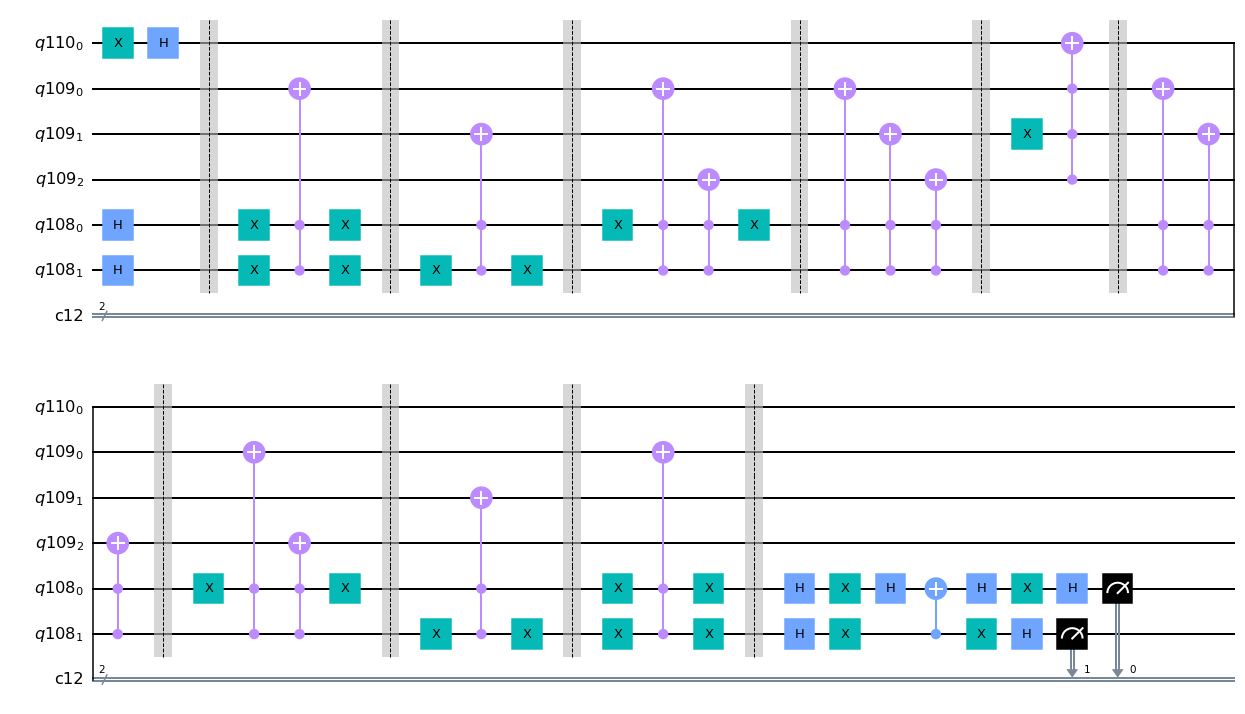

In [20]:
    
address = QuantumRegister(2)
data = QuantumRegister(3)
oracle = QuantumRegister(1)
c = ClassicalRegister(2)
qc = QuantumCircuit(address,data,oracle,c)

# address preparation
qc.h([address[0],address[1]])
qc.x(oracle[0])
qc.h(oracle[0])
qc.barrier()

##Qram part

# address 0 -> data = 1
qc.x([address[0],address[1]])
qc.ccx(address[0],address[1],data[2])
qc.x([address[0],address[1]])
qc.barrier()

# address 1 -> data = 2
qc.x(address[0])
qc.ccx(address[0],address[1],data[1])
qc.x(address[0])
qc.barrier()

# address 2 -> data = 5
qc.x(address[1])
qc.ccx(address[0],address[1],data[2])
qc.ccx(address[0],address[1],data[0])
qc.x(address[1])
qc.barrier()
# address 3 -> data = 7
qc.ccx(address[0],address[1],data[2])
qc.ccx(address[0],address[1],data[1])
qc.ccx(address[0],address[1],data[0])
qc.barrier()

#flip phase of m = 5
qc.x(data[1])
qc.mct([data[0], data[1], data[2]], oracle[0], mode='noancilla')
qc.barrier()

## Reverse Qram part

# address 3 -> data = 7
qc.ccx(address[0],address[1],data[2])
qc.ccx(address[0],address[1],data[1])
qc.ccx(address[0],address[1],data[0])
qc.barrier()

# address 2 -> data = 5
qc.x(address[1])
qc.ccx(address[0],address[1],data[2])
qc.ccx(address[0],address[1],data[0])
qc.x(address[1])
qc.barrier()

# address 1 -> data = 2
qc.x(address[0])
qc.ccx(address[0],address[1],data[1])
qc.x(address[0])
qc.barrier()

# address 0 -> data = 1
qc.x([address[0],address[1]])
qc.ccx(address[0],address[1],data[2])
qc.x([address[0],address[1]])
qc.barrier()


#diffusion
qc.h(address[:2])
qc.x(address[:2])
qc.h(address[1])
qc.cx(address[0], address[1])
qc.h(address[1])
qc.x(address[:2])
qc.h(address[:2])

#Measure the address
qc.measure(address[0:2], c[0:2])

# Reverse the output string.
qc = qc.reverse_bits()

#backend = provider.get_backend('ibmq_qasm_simulator')
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=80000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count =result.get_counts()
print(count)

qc.draw(output='mpl')